In [1]:
import torch

In [4]:
x = torch.empty(4,2)

In [5]:
x

tensor([[3.3605e-24, 1.5442e-42],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])

In [9]:
x = torch.ones(4,2, dtype = torch.float32)

In [10]:
x

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [11]:
print(x.dtype)

torch.float32


In [12]:
print(x.size())

torch.Size([4, 2])


In [13]:
x = torch.rand(3,3)

In [14]:
x

tensor([[0.1199, 0.7673, 0.7713],
        [0.6147, 0.5190, 0.6840],
        [0.4378, 0.2043, 0.4025]])

In [22]:
x = torch.randn(3, requires_grad = True)

In [23]:
print(x)

tensor([-0.1702,  0.0014, -1.2939], requires_grad=True)


In [33]:
#x.requires_grad_(False)
#x.detach()
#with torch.no_grad():
#all this is required for not keeping the information of gradient
print(x)

IndentationError: expected an indented block after 'with' statement on line 3 (3273595035.py, line 4)

In [24]:
y = x + 2

In [25]:
print(y)

tensor([1.8298, 2.0014, 0.7061], grad_fn=<AddBackward0>)


In [26]:
z = y * y * 2

In [27]:
z = z.mean()

In [28]:
print(z)

tensor(5.2348, grad_fn=<MeanBackward0>)


In [29]:
z.backward()

In [30]:
print(x.grad)

tensor([2.4397, 2.6685, 0.9415])


In [34]:
weights = torch.ones(4, requires_grad = True)

In [35]:
print(weights.grad)

None


In [37]:
#for  getting the gradient of a step
for epoch in range(3):
    model_output = (weights * 3).sum()
    model_output.backward()
    
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


 The output is this because the gradients are typically added to existing gradient. That's why use 
weight.grad.zero_() 
 for clearing existing values

In [38]:
x = torch.tensor(1.0)

In [39]:
y = torch.tensor(2.0)

In [40]:
w = torch.tensor(1.0, requires_grad = True)

In [41]:
#forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)** 2

In [42]:
print(loss)

tensor(1., grad_fn=<PowBackward0>)


In [43]:
#backward pass
loss.backward()
print(w.grad)

tensor(-2.)


In [44]:
import numpy as np

In [57]:
X = torch.tensor([1,2,3,4], dtype = torch.float32)

In [58]:
Y = torch.tensor([2,4,6,8], dtype = torch.float32)

In [59]:
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

In [60]:
#model prediction
def forward(x):
    return w * x

In [61]:
#loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

In [62]:
# gradient
#J =  MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2x * (w*x - y)
def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred - y).mean()

In [63]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


In [64]:
#Training
learning_rate = 0.01
n_iters = 1000

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    #gradients
    l.backward() # dl/dw
    
    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad
        
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch + 1} : w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {forward(5): .3f}')

epoch 1 : w = 0.300, loss = 30.00000000
epoch 11 : w = 1.665, loss = 1.16278565
epoch 21 : w = 1.934, loss = 0.04506890
epoch 31 : w = 1.987, loss = 0.00174685
epoch 41 : w = 1.997, loss = 0.00006770
epoch 51 : w = 1.999, loss = 0.00000262
epoch 61 : w = 2.000, loss = 0.00000010
epoch 71 : w = 2.000, loss = 0.00000000
epoch 81 : w = 2.000, loss = 0.00000000
epoch 91 : w = 2.000, loss = 0.00000000
epoch 101 : w = 2.000, loss = 0.00000000
epoch 111 : w = 2.000, loss = 0.00000000
epoch 121 : w = 2.000, loss = 0.00000000
epoch 131 : w = 2.000, loss = 0.00000000
epoch 141 : w = 2.000, loss = 0.00000000
epoch 151 : w = 2.000, loss = 0.00000000
epoch 161 : w = 2.000, loss = 0.00000000
epoch 171 : w = 2.000, loss = 0.00000000
epoch 181 : w = 2.000, loss = 0.00000000
epoch 191 : w = 2.000, loss = 0.00000000
epoch 201 : w = 2.000, loss = 0.00000000
epoch 211 : w = 2.000, loss = 0.00000000
epoch 221 : w = 2.000, loss = 0.00000000
epoch 231 : w = 2.000, loss = 0.00000000
epoch 241 : w = 2.000, los

In [65]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training Loop

#   - forward pass : compute prediction
#   - backward pass : gradients
#   - update weights

In [66]:
import torch.nn as nn

In [80]:
X = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)

In [81]:
X_test = torch.tensor([5], dtype = torch.float32)
n_samples , n_features = X.shape
print(n_samples, n_features)

4 1


In [82]:
input_size = n_features
output_size = n_features

In [84]:
model = nn.Linear(input_size, output_size)

In [85]:
#Training
learning_rate = 0.01
n_iters = 1000


loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    #gradients
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
    
    # setting weights to zero
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch + 1} : w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {forward(5): .3f}')

epoch 1 : w = -0.439, loss = 67.80056763
epoch 11 : w = 1.451, loss = 1.80381680
epoch 21 : w = 1.760, loss = 0.09343369
epoch 31 : w = 1.814, loss = 0.04645988
epoch 41 : w = 1.827, loss = 0.04268107
epoch 51 : w = 1.833, loss = 0.04016899
epoch 61 : w = 1.839, loss = 0.03783028
epoch 71 : w = 1.843, loss = 0.03562833
epoch 81 : w = 1.848, loss = 0.03355453
epoch 91 : w = 1.852, loss = 0.03160149
epoch 101 : w = 1.857, loss = 0.02976215
epoch 111 : w = 1.861, loss = 0.02802980
epoch 121 : w = 1.865, loss = 0.02639833
epoch 131 : w = 1.869, loss = 0.02486181
epoch 141 : w = 1.873, loss = 0.02341469
epoch 151 : w = 1.877, loss = 0.02205184
epoch 161 : w = 1.880, loss = 0.02076833
epoch 171 : w = 1.884, loss = 0.01955952
epoch 181 : w = 1.887, loss = 0.01842104
epoch 191 : w = 1.891, loss = 0.01734884
epoch 201 : w = 1.894, loss = 0.01633905
epoch 211 : w = 1.897, loss = 0.01538803
epoch 221 : w = 1.900, loss = 0.01449237
epoch 231 : w = 1.903, loss = 0.01364882
epoch 241 : w = 1.906, lo

TypeError: unsupported format string passed to Tensor.__format__

In [83]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        
        #define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

#same as 

#model = nn.Linear(input_size, output_size)
        
        

In [86]:
from sklearn import datasets

In [87]:
import matplotlib.pyplot as plt

In [88]:
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

In [89]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

In [90]:
n_samples , n_features = X.shape

In [92]:
# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [93]:
# 2)loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) 

In [94]:
# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss
    
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    #backward pass
    loss.backward()
    
    #update 
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item(): .4f}')


epoch: 10, loss =  4276.6392
epoch: 20, loss =  3195.1082
epoch: 30, loss =  2411.8862
epoch: 40, loss =  1844.1245
epoch: 50, loss =  1432.1683
epoch: 60, loss =  1133.0060
epoch: 70, loss =  915.5823
epoch: 80, loss =  757.4495
epoch: 90, loss =  642.3622
epoch: 100, loss =  558.5514


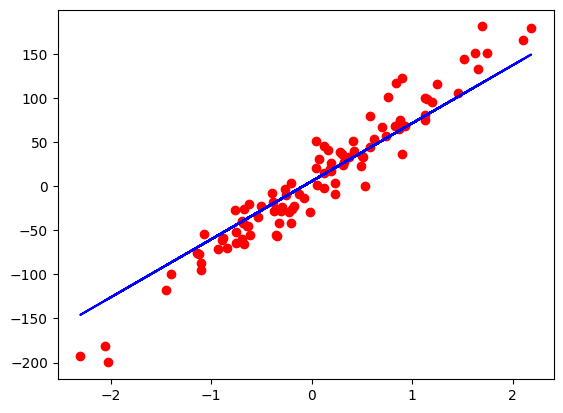

In [95]:
#plot 
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted , 'b')
plt.show()


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [97]:
bc = datasets.load_breast_cancer()


In [98]:
X, y = bc.data, bc.target

In [99]:
n_samples, n_features = X.shape


In [100]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [101]:
# scale features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [104]:
class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features ):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)



In [105]:
# 2) loss and operator
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)



In [106]:
# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    #backward pass
    loss.backward()
    
    #updates
    optimizer.step()
    
    # zero the gradients
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item(): .4f}')
        
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc: .4f}')


epoch: 10, loss =  0.7632
epoch: 20, loss =  0.5986
epoch: 30, loss =  0.4989
epoch: 40, loss =  0.4332
epoch: 50, loss =  0.3866
epoch: 60, loss =  0.3519
epoch: 70, loss =  0.3248
epoch: 80, loss =  0.3031
epoch: 90, loss =  0.2851
epoch: 100, loss =  0.2699
accuracy =  0.8947


In [109]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [124]:
class WineDataset(Dataset):
    
    def __init__(self):
        # data loading
        xy = np.loadtxt('wine.csv', delimiter = ",", dtype = np.float32, skiprows = 1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]])
        self.n_samples = xy.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

In [125]:
dataset = WineDataset()
dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True, num_workers = 2)

In [126]:

class WineDataset(Dataset):
    
    def __init__(self, transform = None):
        # data loading
        xy = np.loadtxt('wine.csv', delimiter = ",", dtype = np.float32, skiprows = 1)
        self.n_samples = xy.shape[0]
        self.x =xy[:, 1:]
        self.y = xy[:, [0]]
        
        self.transform = transform
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
        if self.transform:
            sample = self.transform(sample)
            
            return sample
    
    def __len__(self):
        return self.n_samples
    
class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    
class MulTransform:
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs, target
    
dataset = WineDataset(transform = ToTensor())
first_data = dataset[0]
features , labels = first_data
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform = composed)
first_data = dataset[0]
features , labels = first_data
print(type(features), type(labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [127]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

In [128]:
x = np.array([2.0,1.0,0.1])
outputs = softmax(x)
print('softmax numpy : ', outputs)


softmax numpy :  [0.65900114 0.24243297 0.09856589]


In [130]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim = 0)
print( outputs)

tensor([0.6590, 0.2424, 0.0986])


In [131]:
loss = nn.CrossEntropyLoss()

In [132]:
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss

In [140]:
Y = torch.tensor([2, 0, 1])
# nsamples * nclasses = 1*3
Y_pred_good = torch.tensor([[0.1,1.0,2.1], [2.0,1.0,0.1], [0.1,3.0,0.1]])
Y_pred_bad = torch.tensor([[2.1,1.0,0.1], [0.1,1.0,2.1], [0.1,3.0,0.1]])


In [141]:
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

In [142]:
print(l1.item())
print(l2.item())

0.3018244206905365
1.6241613626480103


In [143]:
_, predictions1 = torch.max(Y_pred_good, 1)

In [144]:
print(predictions1)

tensor([2, 0, 1])
